## Project Steamflow predcition of a paper machine

In papermil steamflow while making a paper roll is very important factor for the user/manager. In the dataset we have 11
independent variable that has influences on steamflow. 
We will apply different algorithms and find out which gives the least error(RMSE) and try implement that in an web app.


###  Apply ML algorithms

- 1 Linear Regression
- 2 XGBoost
- 3 Random Forest with Hyperparameter Tuning
- 4  Decision Tree Regressor with Hyperparameter Tuning



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sklearn
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import os
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [2]:
#importing dataset as dataframe to work with
df=pd.read_csv('papermil_data_new.csv')

In [3]:
#Showing first 5 rows fof the data
df.head()

,a,b,c,d,e,f,g,h,i,j,k,Y
0,185.99,3075.3,48.750,231.28,246.49,246.86,246.41,246.53,95.750,11.782,173.23,16.509
1,185.37,3056.2,40.707,228.65,244.26,243.49,243.84,244.05,95.750,11.645,171.45,16.343
2,185.55,3046.1,40.638,208.19,223.78,222.93,223.66,223.29,75.750,11.751,170.77,16.433
3,187.04,3083.1,40.638,209.97,225.40,224.40,225.11,224.71,79.125,11.728,171.16,16.433
4,205.80,3401.1,30.112,181.99,195.42,196.72,195.67,195.74,49.875,11.684,193.45,16.455


In [4]:
df.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
j    float64
k    float64
Y    float64
dtype: object

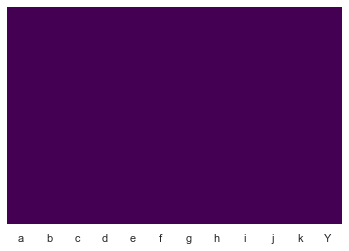

In [5]:
## Check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
#Statistical description of dataframe 
df.describe()

,a,b,c,d,e,f,g,h,i,j,k,Y
count,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,174.558980,2887.792237,37.972812,215.801767,237.021452,236.999768,236.999837,236.985013,75.160020,11.118898,159.916113,18.338152
std,21.726282,365.226054,15.942546,22.078480,21.369723,21.414796,21.334429,21.364826,17.598555,0.878348,20.332352,1.329906
min,130.830000,2147.600000,12.107000,127.410000,142.020000,142.730000,142.840000,143.160000,2.500000,0.000000,115.840000,12.920000
25%,159.775000,2639.000000,25.490500,202.780000,224.915000,224.810000,224.915000,224.890000,65.500000,10.451000,147.010000,17.584000
50%,175.430000,2902.100000,38.315000,219.590000,241.450000,241.330000,241.410000,241.390000,78.510000,11.119000,160.930000,18.480000
75%,191.270000,3168.750000,44.192500,231.640000,252.070000,252.145000,252.075000,252.005000,90.625000,11.855000,175.450000,19.126500
max,222.510000,3699.900000,100.000000,277.200000,291.930000,294.310000,286.470000,289.870000,99.688000,13.174000,204.570000,23.649000


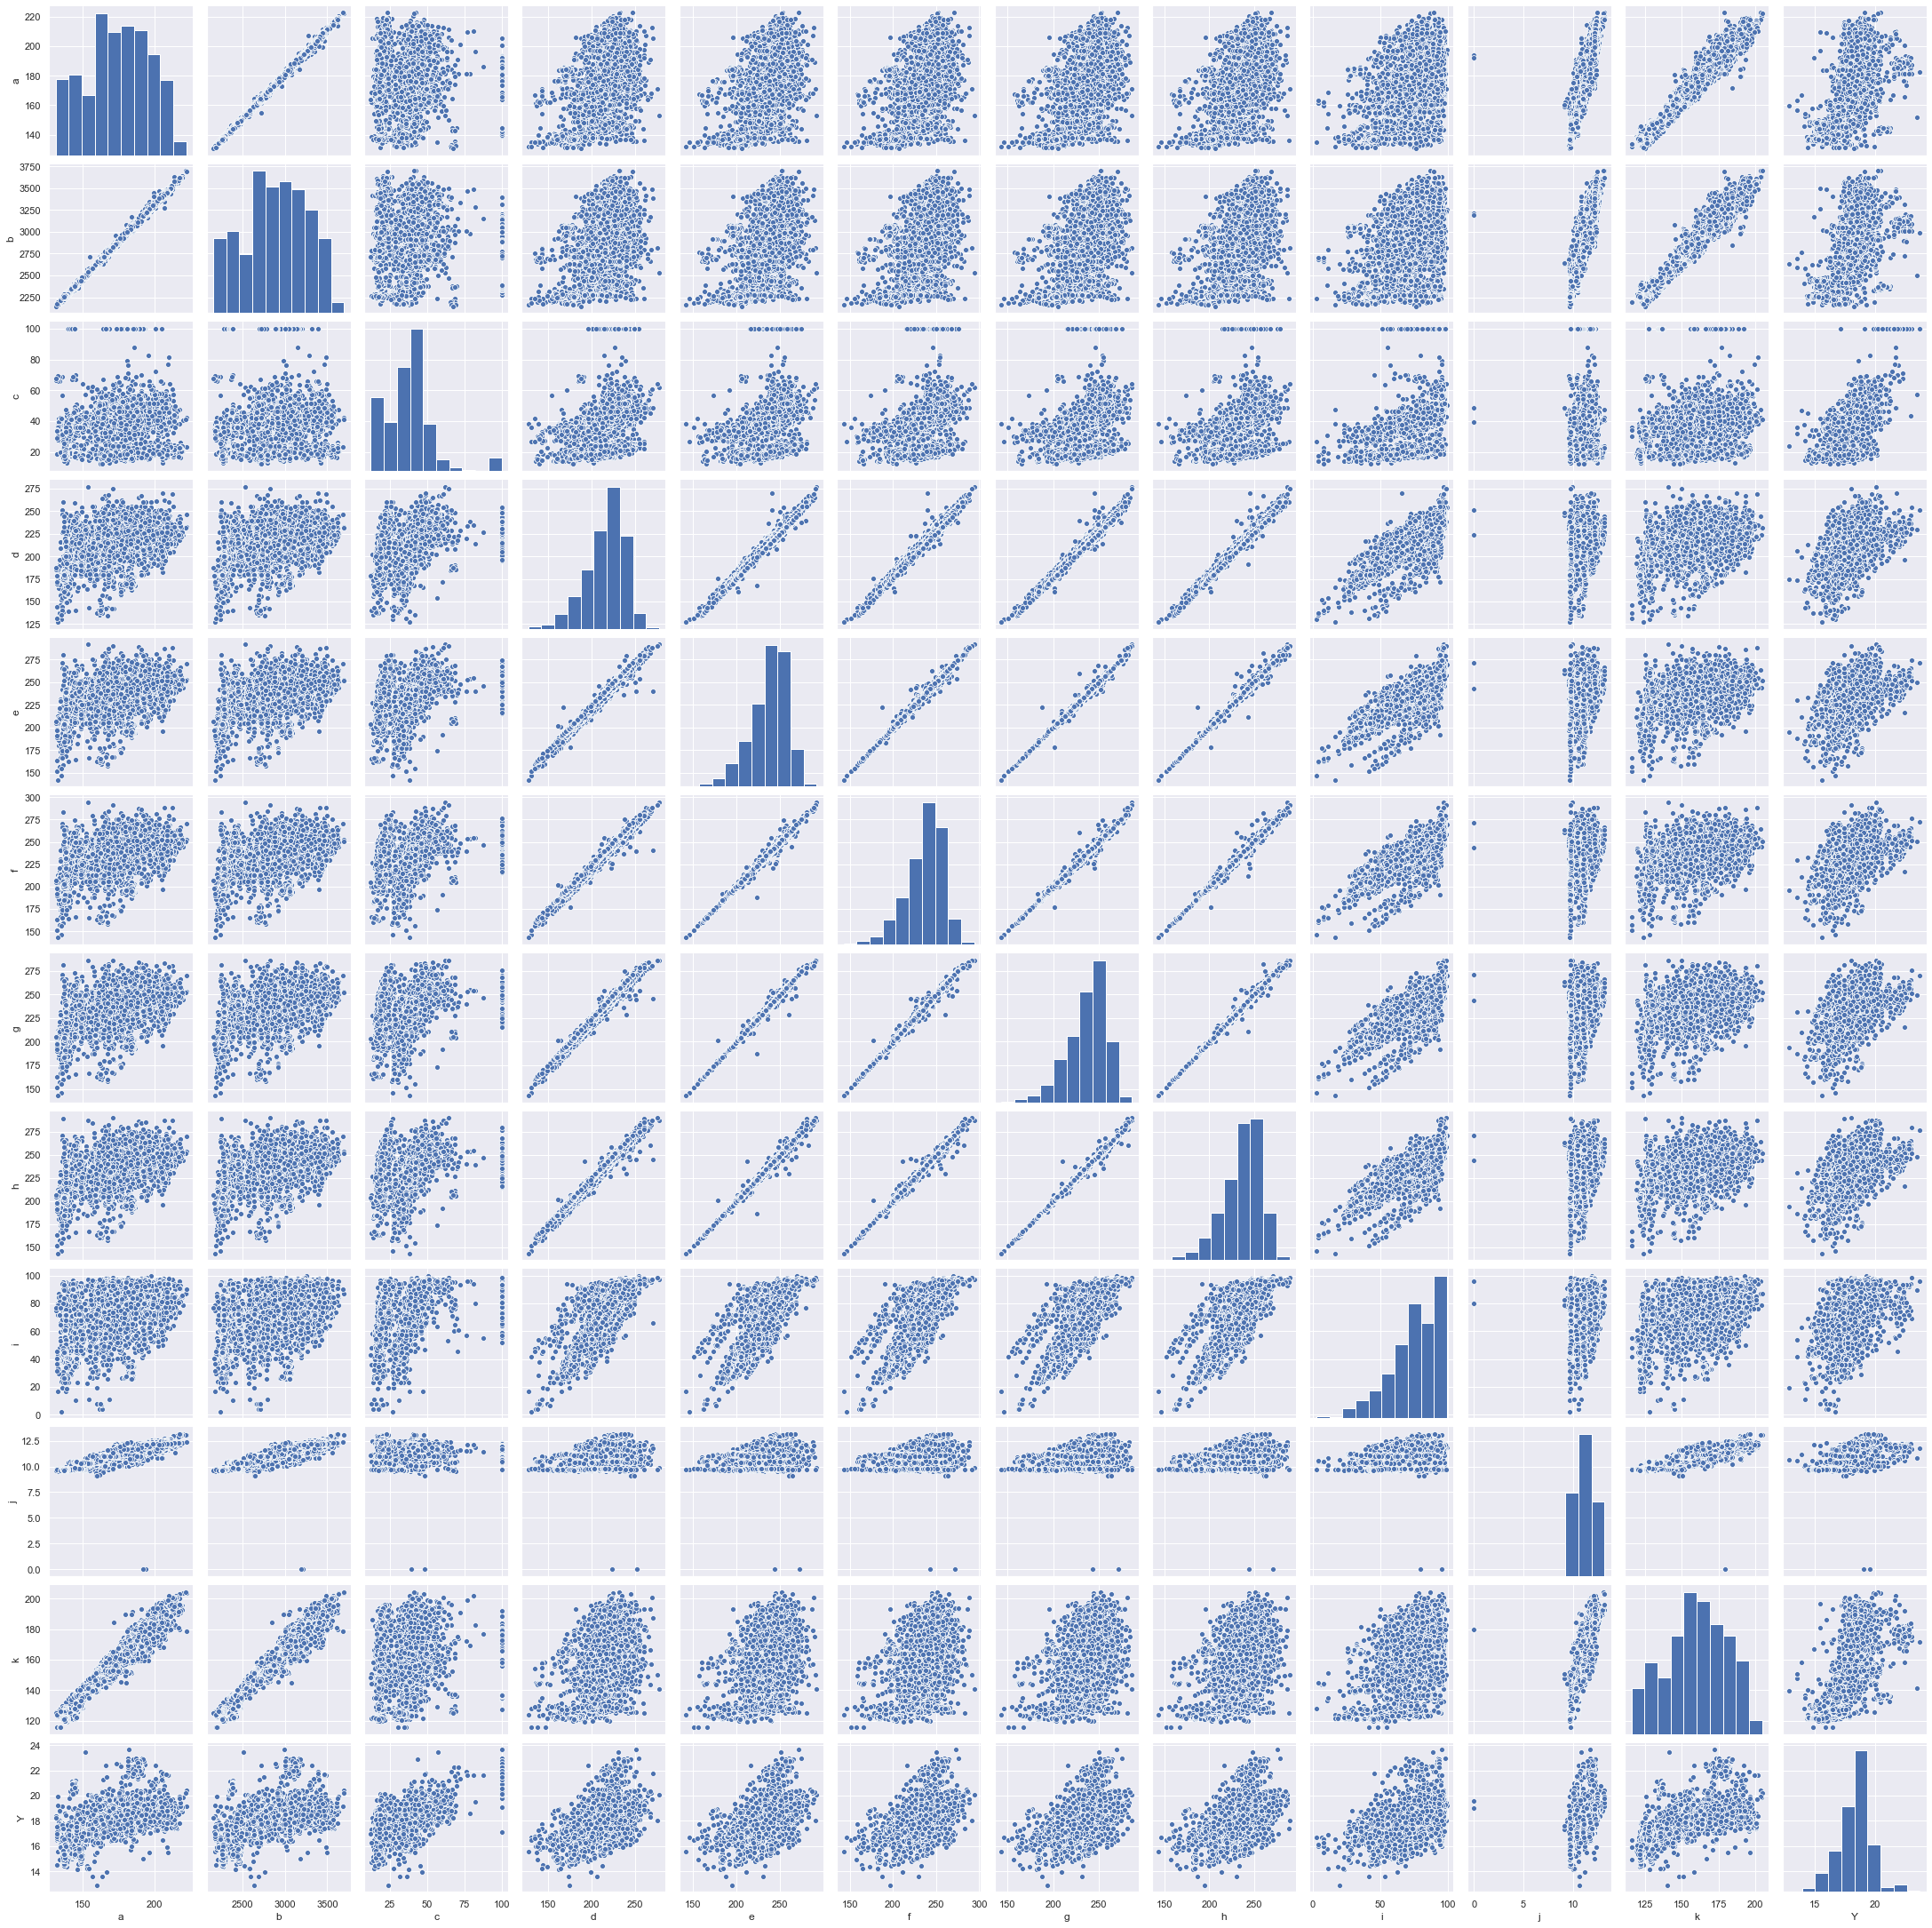

In [4]:
#pairplot is made when you only want to visualize the relationship between two variables, 
#where the variables can be continous, categorical (product type or part of day for example) 
#or booleans (yes/no - 1/0).
sns.pairplot(df)

In [5]:
#Pair wise correlation of the dataframe
df.corr(method='pearson')

,a,b,c,d,e,f,g,h,i,j,k,Y
a,1.000000,0.999054,0.089515,0.417484,0.467418,0.467243,0.467735,0.466962,0.387294,0.851722,0.967239,0.508953
b,0.999054,1.000000,0.084339,0.414138,0.466037,0.465963,0.466522,0.465739,0.385457,0.852954,0.965442,0.506810
c,0.089515,0.084339,1.000000,0.350647,0.329417,0.329302,0.330702,0.328481,0.446546,0.053781,0.199207,0.635961
d,0.417484,0.414138,0.350647,1.000000,0.981893,0.981652,0.981891,0.981237,0.753360,0.354241,0.427573,0.540949
e,0.467418,0.466037,0.329417,0.981893,1.000000,0.997312,0.997771,0.996760,0.769580,0.409213,0.470928,0.547853
f,0.467243,0.465963,0.329302,0.981652,0.997312,1.000000,0.997311,0.996719,0.768714,0.410073,0.470547,0.548724
g,0.467735,0.466522,0.330702,0.981891,0.997771,0.997311,1.000000,0.998210,0.769734,0.409940,0.471265,0.548878
h,0.466962,0.465739,0.328481,0.981237,0.996760,0.996719,0.998210,1.000000,0.768915,0.409751,0.470113,0.547301
i,0.387294,0.385457,0.446546,0.753360,0.769580,0.768714,0.769734,0.768915,1.000000,0.358508,0.405174,0.501262
j,0.851722,0.852954,0.053781,0.354241,0.409213,0.410073,0.409940,0.409751,0.358508,1.000000,0.832899,0.524228


In [6]:
df.describe()

,a,b,c,d,e,f,g,h,i,j,k,Y
count,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,174.558980,2887.792237,37.972812,215.801767,237.021452,236.999768,236.999837,236.985013,75.160020,11.118898,159.916113,18.338152
std,21.726282,365.226054,15.942546,22.078480,21.369723,21.414796,21.334429,21.364826,17.598555,0.878348,20.332352,1.329906
min,130.830000,2147.600000,12.107000,127.410000,142.020000,142.730000,142.840000,143.160000,2.500000,0.000000,115.840000,12.920000
25%,159.775000,2639.000000,25.490500,202.780000,224.915000,224.810000,224.915000,224.890000,65.500000,10.451000,147.010000,17.584000
50%,175.430000,2902.100000,38.315000,219.590000,241.450000,241.330000,241.410000,241.390000,78.510000,11.119000,160.930000,18.480000
75%,191.270000,3168.750000,44.192500,231.640000,252.070000,252.145000,252.075000,252.005000,90.625000,11.855000,175.450000,19.126500
max,222.510000,3699.900000,100.000000,277.200000,291.930000,294.310000,286.470000,289.870000,99.688000,13.174000,204.570000,23.649000


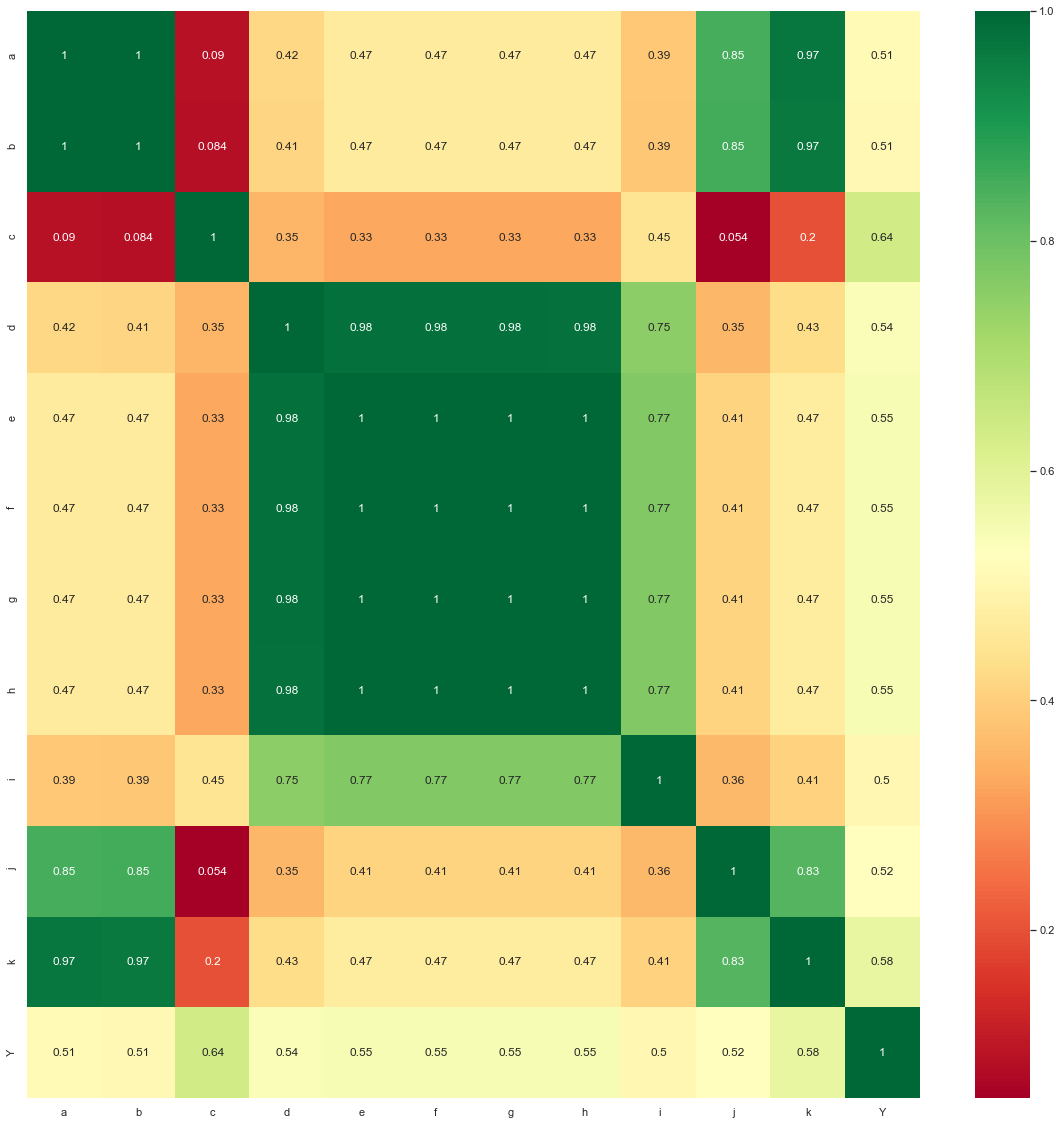

In [7]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
corrmat.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'Y'], dtype='object')

In [9]:
#Correlation with output variable
cor_target = abs(corrmat["Y"])
#Selecting highly correlated features
cor_target.sort_values(ascending=False)


Y    1.000000
c    0.635961
k    0.581135
g    0.548878
f    0.548724
e    0.547853
h    0.547301
d    0.540949
j    0.524228
a    0.508953
b    0.506810
i    0.501262
Name: Y, dtype: float64

## Separating the y and X in the data set and apply feature selection using Lasso

In [14]:
## Capture the dependent feature
y_train=df[['Y']]
y_train.head()

,Y
0,16.509
1,16.343
2,16.433
3,16.433
4,16.455


In [16]:
## drop dependent feature from dataset
X_train=df.drop(['Y'],axis=1)
X_train.head()

,a,b,c,d,e,f,g,h,i,j,k
0,185.99,3075.3,48.750,231.28,246.49,246.86,246.41,246.53,95.750,11.782,173.23
1,185.37,3056.2,40.707,228.65,244.26,243.49,243.84,244.05,95.750,11.645,171.45
2,185.55,3046.1,40.638,208.19,223.78,222.93,223.66,223.29,75.750,11.751,170.77
3,187.04,3083.1,40.638,209.97,225.40,224.40,225.11,224.71,79.125,11.728,171.16
4,205.80,3401.1,30.112,181.99,195.42,196.72,195.67,195.74,49.875,11.684,193.45


In [18]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.5, random_state=54321)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.5, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=54321,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [19]:
feature_sel_model.get_support()

array([False,  True,  True,  True, False,  True, False, False, False,
       False,  True])

In [22]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
#print('features with coefficients shrank to zero: {}'.format(
 #   np.sum(sel_.estimator_.coef_ == 0)))

total features: 11
selected features: 5


In [23]:
selected_feat

Index(['b', 'c', 'd', 'f', 'k'], dtype='object')

In [24]:
X_train=X_train[selected_feat]

In [25]:
#The new dataset by concatinating X and y
newdf = pd.concat([X_train, y_train], axis=1)

In [29]:
#Saving the new dataframe as CSV 
newdf.to_csv (r'C:\Users\A549773\ML-examples-RD\steamflow-new\papermil_clean_data_5cols.csv', index = False, header=True)

In [31]:
#Seperating Independent variable and dependent variable
X= newdf[['b',  
       'c', 
       'd',
       'f',
       'k'
      ]]
y= newdf[['Y']]


In [33]:
print(X)

           b       c       d       f       k
0     3075.3  48.750  231.28  246.86  173.23
1     3056.2  40.707  228.65  243.49  171.45
2     3046.1  40.638  208.19  222.93  170.77
3     3083.1  40.638  209.97  224.40  171.16
4     3401.1  30.112  181.99  196.72  193.45
...      ...     ...     ...     ...     ...
3486  2923.6  18.095  196.01  221.89  160.52
3487  2989.9  18.454  208.79  234.45  163.61
3488  3057.9  20.586  218.22  242.85  169.08
3489  3031.2  20.590  214.01  239.32  168.79
3490  2997.6  18.769  198.93  223.18  163.90

[3491 rows x 5 columns]


## Train and test split 

In [34]:
from sklearn.model_selection import train_test_split

from sklearn import metrics 
#training set 80%
#testing set 20%

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.20)

print(X_train)

           b       c       d       f       k
2095  2311.5  33.835  161.25  186.32  130.10
3472  2712.0  12.107  178.76  204.36  148.53
3277  2953.0  14.766  195.28  220.69  163.21
2232  3436.4  57.556  247.71  267.89  198.03
1887  2739.4  37.388  225.39  245.50  154.43
...      ...     ...     ...     ...     ...
1420  3368.5  42.523  235.92  260.90  181.48
817   3163.6  43.334  208.88  235.21  169.07
1120  2294.5  29.310  172.41  197.64  124.69
273   2955.5  37.748  247.16  262.58  165.61
2514  3146.2  56.321  248.43  268.94  180.42

[2792 rows x 5 columns]


## 1. Linear Regression
From Wilipedia: 
In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression
https://en.wikipedia.org/wiki/Linear_regression#cite_note-Freedman09-1

In [35]:
##initiate the model
model= LinearRegression()
##Fiting the model
model_fit= model.fit(X_train, y_train)

In [36]:
##Testing the model
test_predict = model_fit.predict(X_test)

In [37]:
##Root Mean Square error(RMSE)
rmse_lreg= np.sqrt(metrics.mean_squared_error(y_test, test_predict))
print('Root Mean squared error RMSE: ' +str(rmse_lreg))

Root Mean squared error RMSE: 0.7848940786278842


In [38]:
from sklearn.metrics import r2_score
r2_lreg = r2_score(y_test, test_predict)
print("R2 SCORE ON TEST DATA: {}".format(r2_lreg))

R2 SCORE ON TEST DATA: 0.647775498688384


In [39]:
# Saving the XGB model
import pickle
pickle.dump(model, open('papermil_lreg.pkl', 'wb'))

### 2. XGBoost

XGBoost stands for eXtreme Gradient Boosting.

"The name xgboost, though, actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms. Which is the reason why many people use xgboost."- Tianqi Chen

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. Source: https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/


In [80]:
import xgboost
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 10000),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbreg = xgboost.XGBRegressor(nthreads=-1)

In [81]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [82]:
random_search=RandomizedSearchCV(xgbreg,params,n_iter=10,n_jobs=-1,cv=10,verbose=3)

In [83]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [84]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train.values.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished


[13:25:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

 Time taken: 0 hours 1 minutes and 54.37 seconds.


In [85]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9026700878454762,
             gamma=2.304514871405514, importance_type='gain',
             learning_rate=0.2902570057270781, max_delta_step=0, max_depth=24,
             min_child_weight=32.9797748671315, missing=None, n_estimators=7399,
             n_jobs=1, nthread=None, nthreads=-1, objective='reg:linear',
             random_state=0, reg_alpha=20.836343631326525, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None,
             subsample=0.8034214428040698, verbosity=1)

In [86]:
modelXGB=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9026700878454762,
             gamma=2.304514871405514, importance_type='gain',
             learning_rate=0.2902570057270781, max_delta_step=0, max_depth=24,
             min_child_weight=32.9797748671315, missing=None, n_estimators=7399,
             n_jobs=1, nthread=None, nthreads=-1, objective='reg:linear',
             random_state=0, reg_alpha=20.836343631326525, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None,
             subsample=0.8034214428040698, verbosity=1)

In [87]:
modelXGB.fit(X_train,y_train)
test_predict_XGB = modelXGB.predict(X_test)
# Predict (after fitting GridSearchCV is an estimator with best parameters)
y_pred = modelXGB.predict(X_test)
 
# Score
from sklearn.metrics import r2_score
r2_xgb = r2_score(y_test, y_pred)
print("R2 SCORE ON TEST DATA: {}".format(r2_xgb))

[13:25:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 SCORE ON TEST DATA: 0.7747168888293566


In [88]:
from sklearn.metrics import mean_squared_error
rmse_xgb = np.sqrt(mean_squared_error(y_test, test_predict_XGB))
print("RMSE: %f" % (rmse_xgb))

RMSE: 0.627719


In [89]:
# Saving the XGB model
import pickle
pickle.dump(modelXGB, open('papermil_xgb.pkl', 'wb'))

### 3. RandomForest with hyperparameter tuning
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.
From: https://en.wikipedia.org/wiki/Random_forest


In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.
From: https://en.wikipedia.org/wiki/Hyperparameter_optimization

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV # Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500, 1000]
}
# Create a based model
rf = RandomForestRegressor() # Instantiate the grid search model
random_search = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 5, n_jobs = -1, verbose = 2)
model_fit_RF= random_search.fit(X_train, y_train)
print(model_fit_RF.best_params_)
##Testing the model
test_predict_RF = model_fit_RF.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.9s finished
C:\Users\A549773\Anaconda3-new\envs\py37\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'n_estimators': 1000, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 2, 'max_depth': 110, 'bootstrap': True}


In [91]:
from sklearn import metrics

print('RF Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_predict_RF))
print('RF Mean Squared Error:', metrics.mean_squared_error(y_test, test_predict_RF))
print('RF R2:', metrics.r2_score(y_test, test_predict_RF))
print('RF Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_predict_RF)))


RF Mean Absolute Error: 0.39742848731702646
RF Mean Squared Error: 0.32145734991295466
RF R2: 0.8162104486621987
RF Root Mean Squared Error: 0.5669720891833695


In [92]:
# Saving the model
import pickle
pickle.dump(model_fit_RF, open('papermil_rf.pkl', 'wb'))

## 4.  Decision Tree Regressor with Hyperparameter Tuning

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements. 
From: https://en.wikipedia.org/wiki/Decision_tree

In [53]:
#DT with hypeparmeter tuning
from sklearn.tree import DecisionTreeRegressor
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}


In [54]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeRegressor()
random_search_dt=GridSearchCV(dtree,param_grid=params,scoring='r2',n_jobs=-1,cv=10,verbose=3)
model_fit_DT=random_search_dt.fit(X_train, y_train)
print(model_fit_DT.best_score_)

predictions_dt=random_search_dt.predict(X_test)


Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 4980 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 12148 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 21364 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 32628 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 45940 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 61300 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 78708 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 98164 tasks      | elapsed:  1.2min


0.5458564854010719


[Parallel(n_jobs=-1)]: Done 102400 out of 102400 | elapsed:  1.2min finished


In [55]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_dt))
print('MSE:', metrics.mean_squared_error(y_test, predictions_dt))
print('R2:', metrics.r2_score(y_test, predictions_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_dt)))

MAE: 0.6703414453175831
MSE: 0.84193222310398
R2: 0.5186349119626019
RMSE: 0.9175686476247867


###### Saving the model
import pickle
pickle.dump(model_fit_DT, open('papermil_dt.pkl', 'wb'))